In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib

In [2]:
save_plots = True

In [3]:
## Create plots directory, if missing
plotsDirectory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_davinci_parsed_logs/'
                  + 'position_momentum_covariance_matrix_analysis/'
)
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

In [4]:
convergedColor = 'tab:blue'
failedColor = 'tab:orange'

# Import MC data

In [5]:
inputFile = '~/data/parsedDaVinciLog.h5'
df_events = pd.read_hdf(inputFile, key='LHCbMC_Lb')

# Helper functions

In [6]:
## Rows and columns begin at 0
def Feature2DComponent(series, row, column):
    return series.map(lambda x: x[row][column])

def Feature1DComponent(series, component):
    return series.map(lambda x: x[component])

# Position-momentum covariance matrix analysis
## Component distribution for initial `posMomCov` matrices

In [7]:
def PlotOverlappingHistograms(
    series,
    axisLabel,
    plotTitle,
    fileName,
    binning,
    boundaries,
    scale='linear',
    scientificNotationLabel=False,
    normalized=True
):
    ## Converged
    plt.hist(series.loc[df_events['status'] == 'Converged'],
             bins=binning,
             range=boundaries,
             label="Converged",
             histtype='stepfilled',
             edgecolor=convergedColor,
             color=mcolors.to_rgba(convergedColor, alpha=0.05),
             density=normalized
    )
    
    ## Failed
    plt.hist(series.loc[df_events['status'] == 'NonConverged'],
             bins=binning,
             range=boundaries,
             label="Failed",
             histtype='stepfilled',
             edgecolor=failedColor,
             color=mcolors.to_rgba(failedColor, alpha=0.05),
             density=normalized
    )
    
   
    plt.grid()
    plt.xlabel(axisLabel)
    plt.title(plotTitle)
    plt.yscale(scale)
    
    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientificNotationLabel:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plotsDirectory + fileName + '.pdf', bbox_inches='tight')
    
    plt.show()

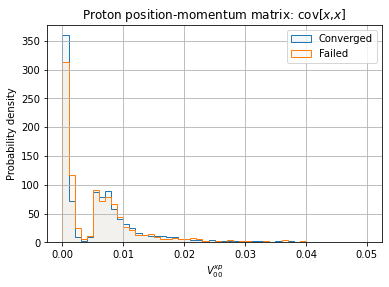

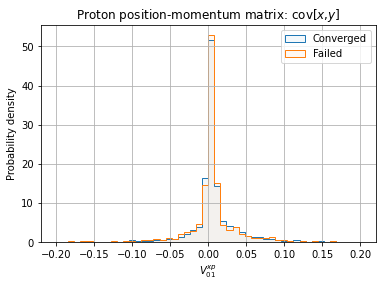

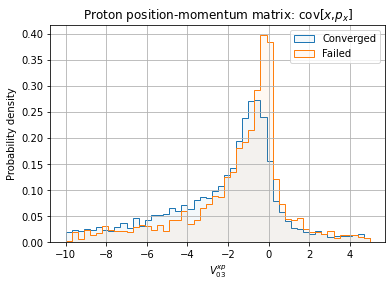

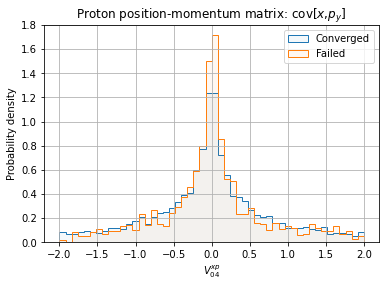

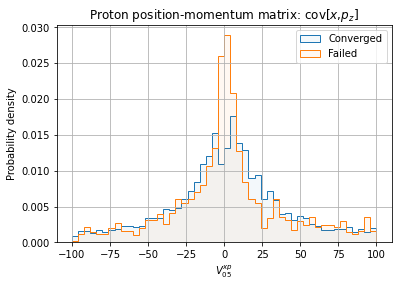

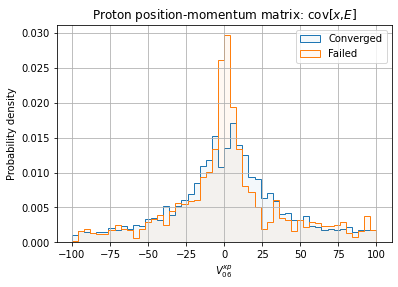

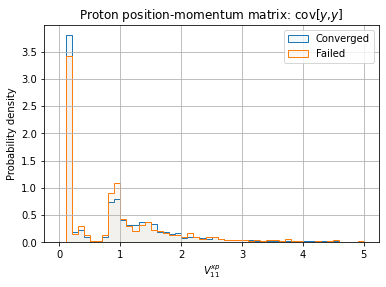

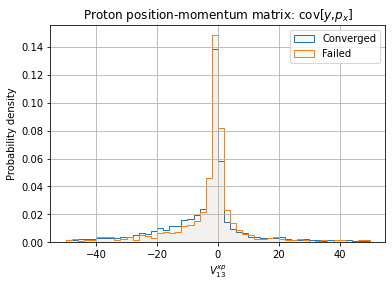

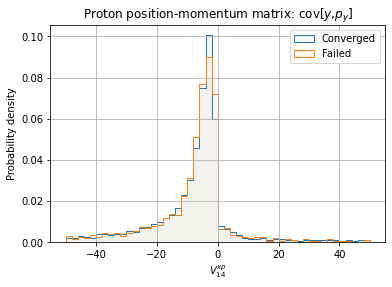

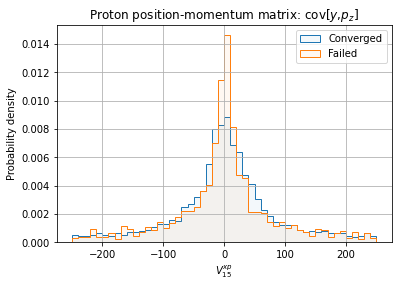

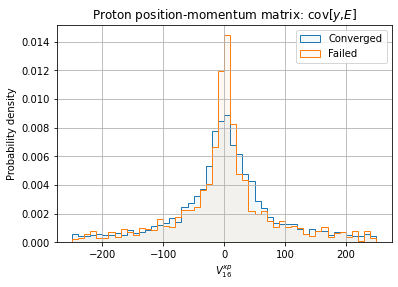

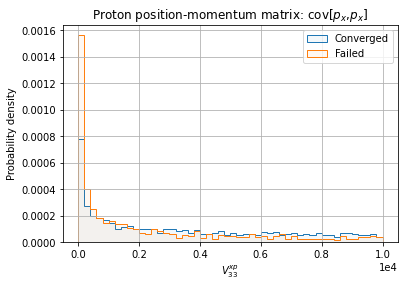

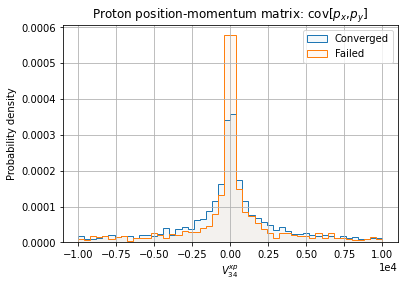

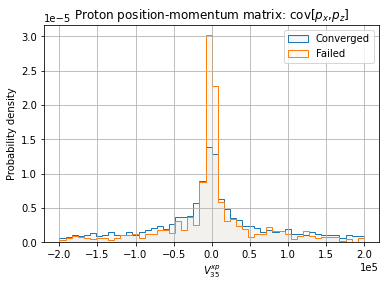

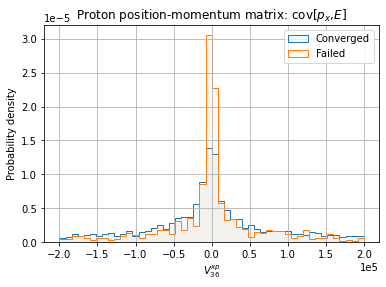

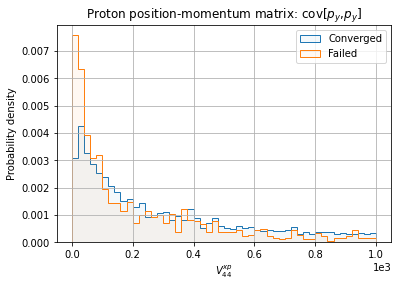

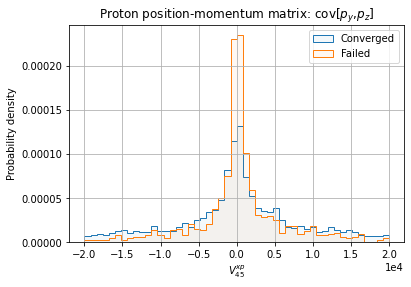

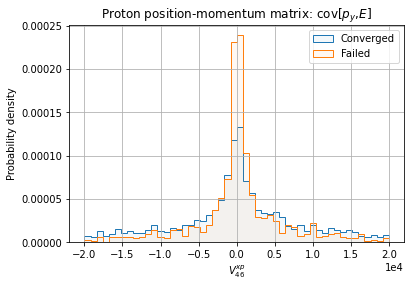

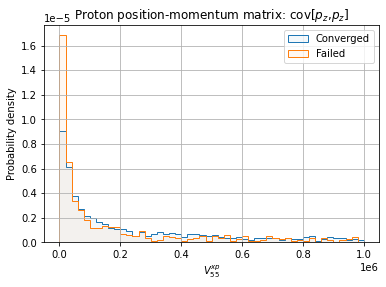

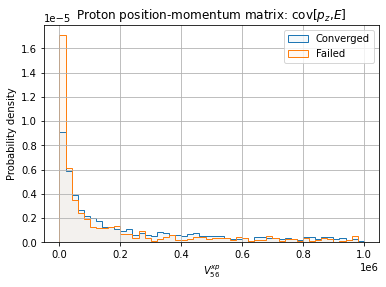

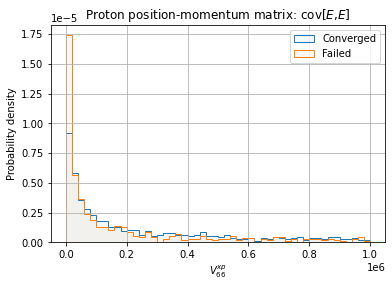

In [8]:
compToCoord = {0: 'x', 1: 'y', 2: 'z'}

rowToQuantity = {
    0: '$x$',
    1: '$y$',
    2: '$z$',
    3: '$p_x$',
    4: '$p_y$',
    5: '$p_z$',
    6: '$E$'
}

coordsToBoundaries = {
    (0,0): (0, .05),
    (0,1): (-.2,.2),
    (0,3): (-10,5),
    (0,4): (-2,2),
    (0,5): (-100,100),
    (0,6): (-100,100),
    (1,1): (0,5),
    (1,3): (-50,50),
    (1,4): (-50,50),
    (1,5): (-250,250),
    (1,6): (-250,250),
    (3,3): (0,1e4),
    (3,4): (-1e4,1e4),
    (3,5): (-2e5,2e5),
    (3,6): (-2e5,2e5),
    (4,4): (0,1e3),
    (4,5): (-2e4,2e4),
    (4,6): (-2e4,2e4),
    (5,5): (0,1e6),
    (5,6): (0,1e6),
    (6,6): (0,1e6)
}

for row in range(7):
    for column in range(row,7):
        
        ## Row/column 2 is all zeros
        if row == 2 or column == 2:
            continue
        
        if row >= 3:
            scientificNotation = True
        else:
            scientificNotation = False
            
        title = "Proton position-momentum matrix: cov[" + rowToQuantity[row] + "," + rowToQuantity[column] + "]"
        
        plotArgs = {
            "axisLabel": "$V^{xp}_{" + str(row) + str(column) + "}$",
            "plotTitle": title,
            "fileName": "proton_vxp_" + str(row) + "_"+ str(column),
            "scale": "linear",
            "binning": 50,
            "boundaries": coordsToBoundaries[(row,column)],
            "scientificNotationLabel": scientificNotation,
            "normalized": True
        }
        
        PlotOverlappingHistograms(Feature2DComponent(df_events['p_posMomCovMatrix'], row, column), **plotArgs)

## Relative uncertainties on proto-particle reference points and momenta

In [9]:
refPointCoordToBoundaries = {
    0: (-.01,.01),
    1: (-.1,.1),
}

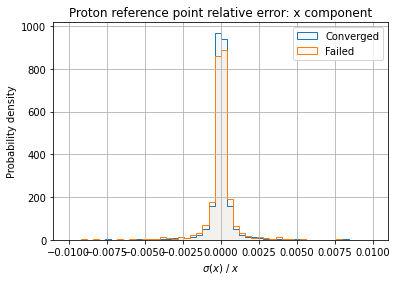

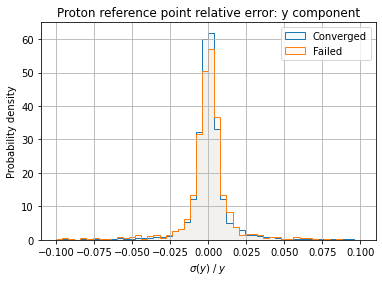

In [10]:
for comp in range(2):
    coord = compToCoord[comp]
    scientificNotation = False

    plotArgs = {
        "axisLabel": "$\sigma(" + coord + ")$ / $" + coord + "$",
        "plotTitle": "Proton reference point relative error: " + coord + " component",
        "fileName": "proton_refPoint_error_" + coord,
        "scale": "linear",
        "binning": 50,
        "boundaries": refPointCoordToBoundaries[comp],
        "scientificNotationLabel": scientificNotation,
        "normalized": True
    }

    PlotOverlappingHistograms(
        np.sqrt(Feature2DComponent(df_events['p_posMomCovMatrix'],comp,comp))/Feature1DComponent(df_events['p_refPoint'],comp),
        **plotArgs
    )


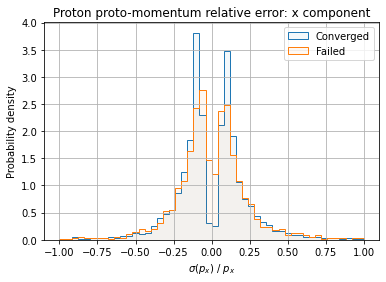

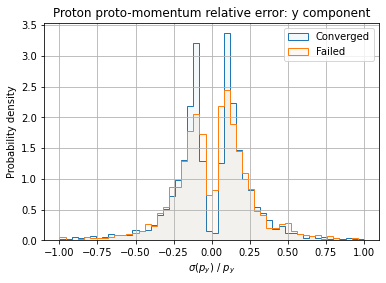

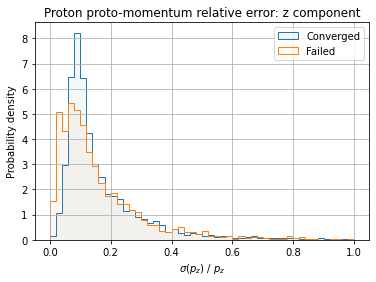

In [11]:
momentumCoordToBoundaries = {
    0: (-1,1),
    1: (-1,1),
    2: (0,1)
}

for comp in range(3):
    coord = compToCoord[comp]
    scientificNotation = False

    plotArgs = {
        "axisLabel": "$\sigma(p_" + coord + ")$ / $p_" + coord + "$",
        "plotTitle": "Proton proto-momentum relative error: " + coord + " component",
        "fileName": "proton_momentum_error_" + coord,
        "scale": "linear",
        "binning": 50,
        "boundaries": momentumCoordToBoundaries[comp],
        "scientificNotationLabel": scientificNotation,
        "normalized": True
    }

    PlotOverlappingHistograms(
        np.sqrt(Feature2DComponent(df_events['p_posMomCovMatrix'],comp+3,comp+3))/Feature1DComponent(df_events['p_momentum'],comp),
        **plotArgs
    )

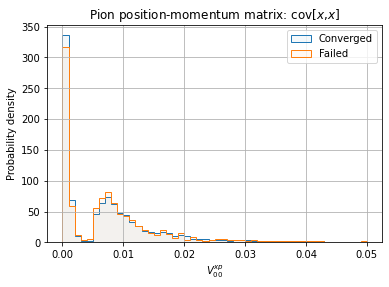

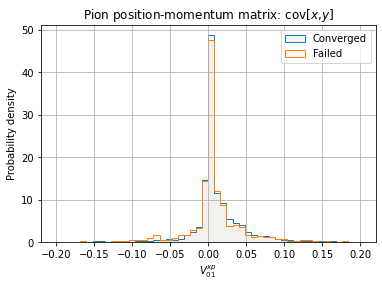

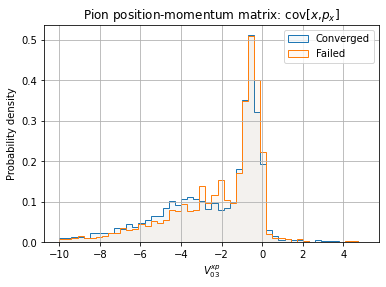

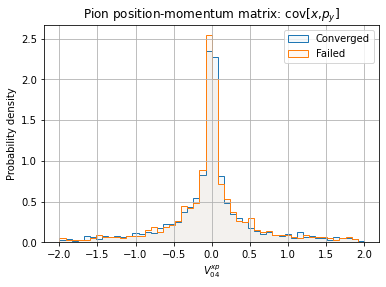

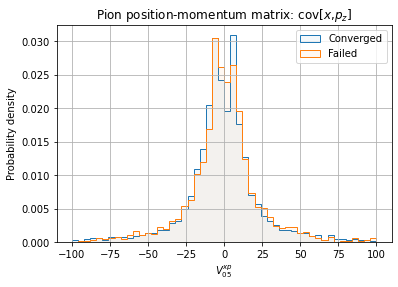

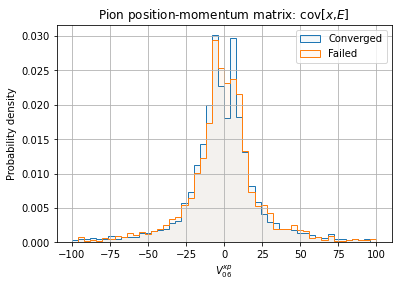

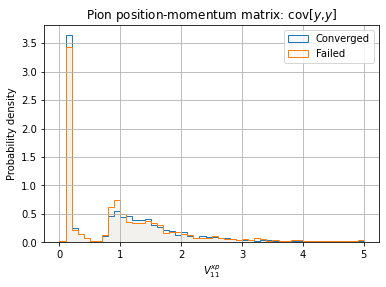

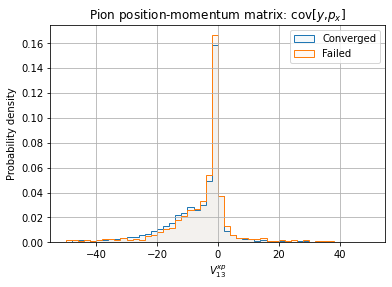

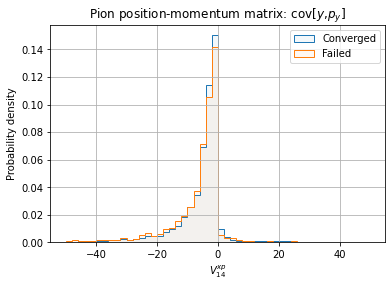

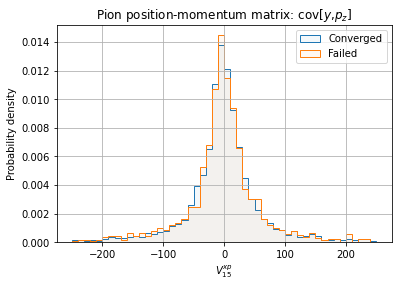

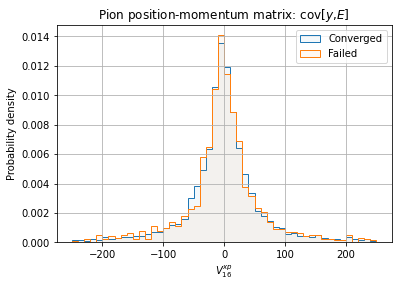

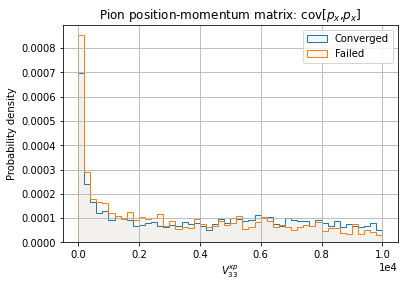

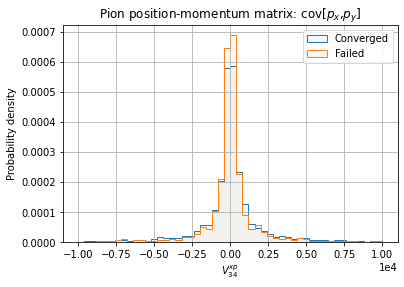

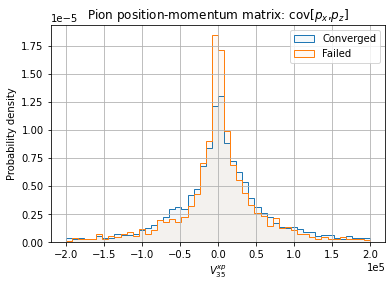

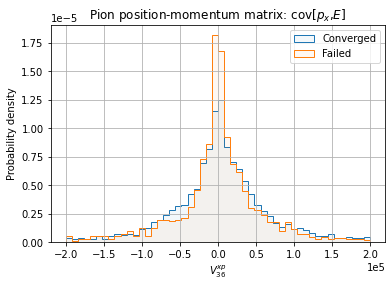

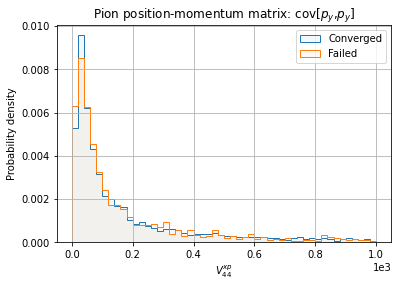

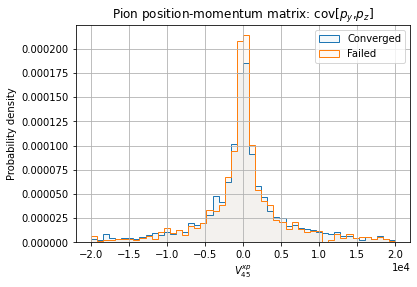

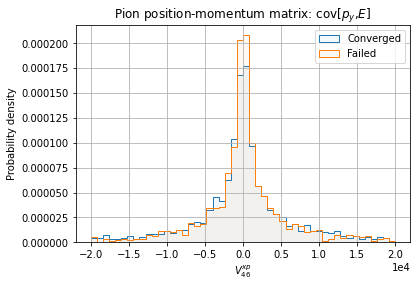

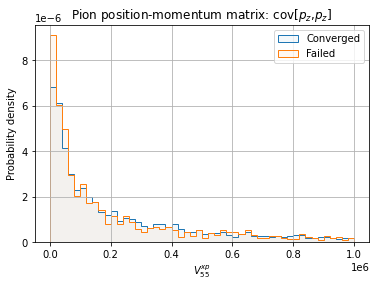

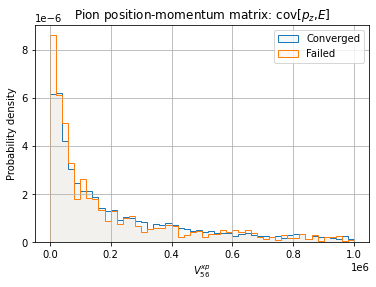

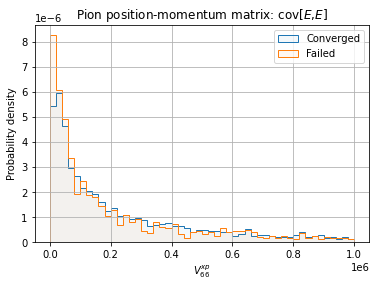

In [12]:
coordsToBoundaries = {
    (0,0): (0, .05),
    (0,1): (-.2,.2),
    (0,3): (-10,5),
    (0,4): (-2,2),
    (0,5): (-100,100),
    (0,6): (-100,100),
    (1,1): (0,5),
    (1,3): (-50,50),
    (1,4): (-50,50),
    (1,5): (-250,250),
    (1,6): (-250,250),
    (3,3): (0,1e4),
    (3,4): (-1e4,1e4),
    (3,5): (-2e5,2e5),
    (3,6): (-2e5,2e5),
    (4,4): (0,1e3),
    (4,5): (-2e4,2e4),
    (4,6): (-2e4,2e4),
    (5,5): (0,1e6),
    (5,6): (0,1e6),
    (6,6): (0,1e6)
}

for row in range(7):
    for column in range(row,7):
        
        ## Row/column 2 is all zeros
        if row == 2 or column == 2:
            continue
        
        if row >= 3:
            scientificNotation = True
        else:
            scientificNotation = False
            
        title = "Pion position-momentum matrix: cov[" + rowToQuantity[row] + "," + rowToQuantity[column] + "]"
        
        plotArgs = {
            "axisLabel": "$V^{xp}_{" + str(row) + str(column) + "}$",
            "plotTitle": title,
            "fileName": "pion_vxp_" + str(row) + "_"+ str(column),
            "scale": "linear",
            "binning": 50,
            "boundaries": coordsToBoundaries[(row,column)],
            "scientificNotationLabel": scientificNotation,
            "normalized": True
        }
        
        PlotOverlappingHistograms(Feature2DComponent(df_events['pim_posMomCovMatrix'], row, column), **plotArgs)